Except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.isnull().sum().max()

0

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print('Non-fraudulent transcations = ',len(df[df['Class']==0]))
print('fraudulent transcations = ',len(df[df['Class']==1]))

Non-fraudulent transcations =  284315
fraudulent transcations =  492


Such an imbalanced dataset is riskier and will be prone to overfitting , we don't want our model to assume , we want to detect patterns that give us signs of fraud.

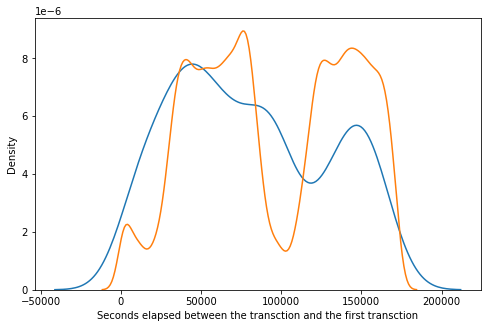

In [5]:
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [7]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


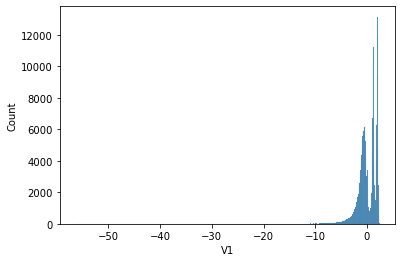

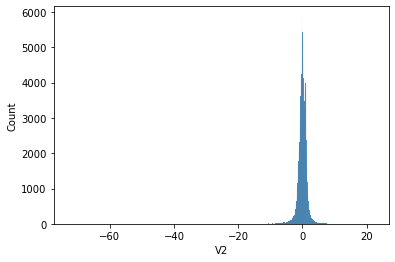

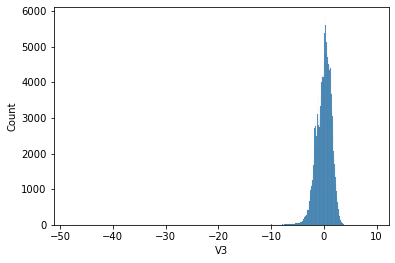

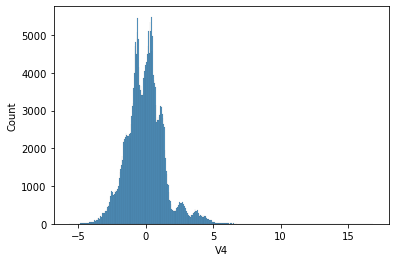

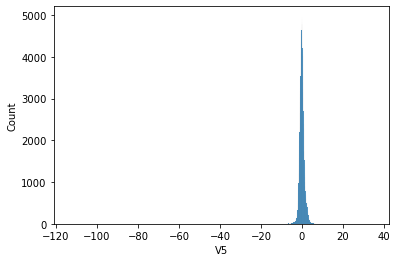

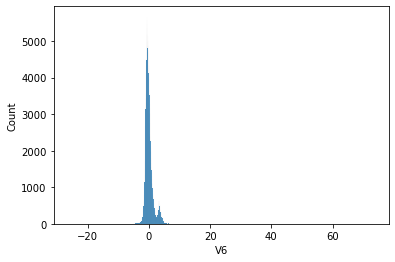

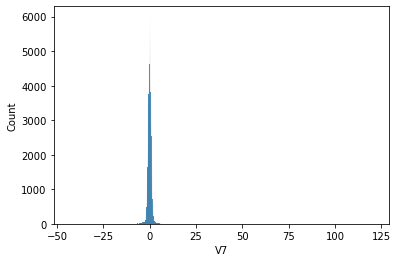

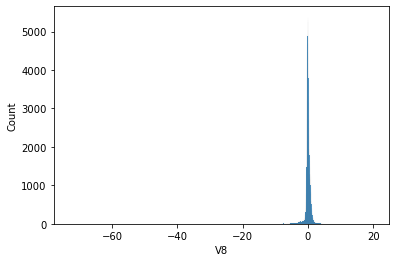

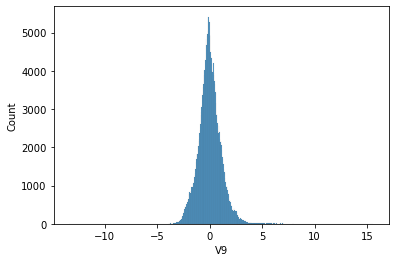

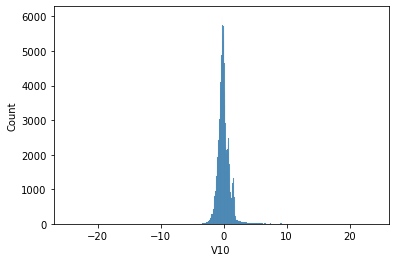

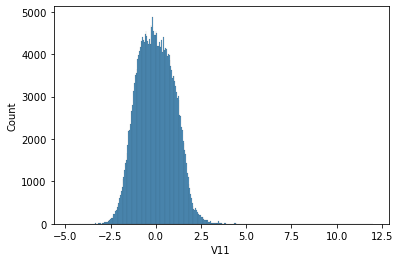

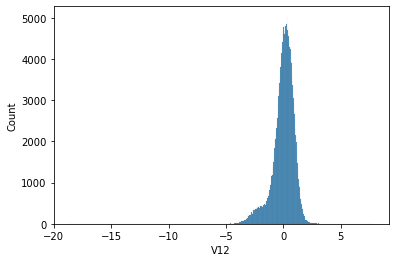

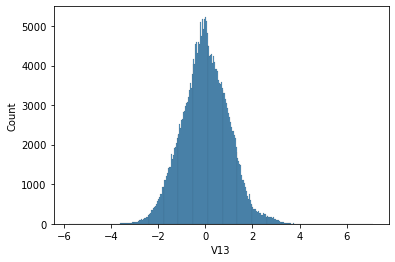

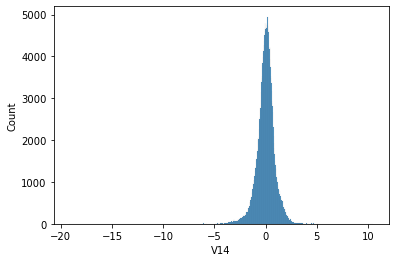

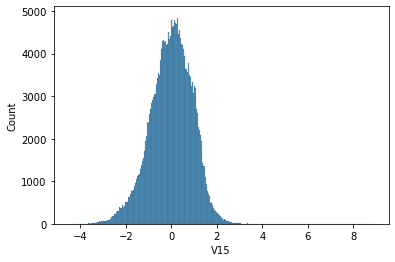

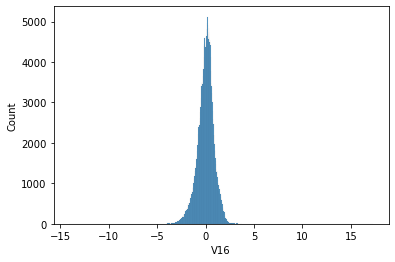

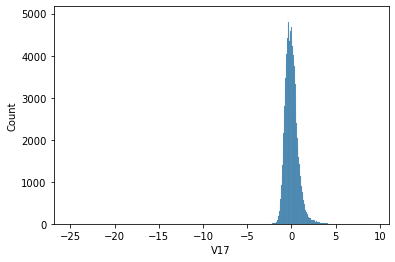

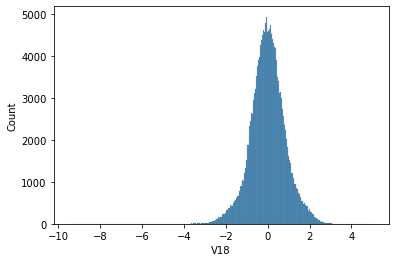

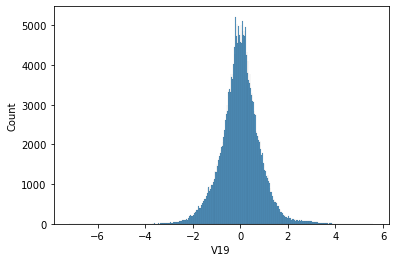

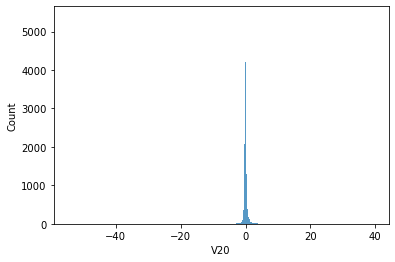

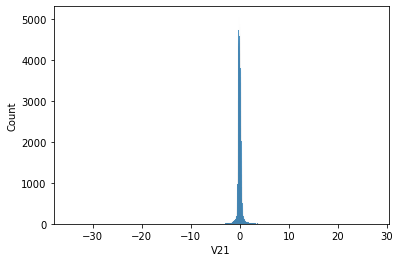

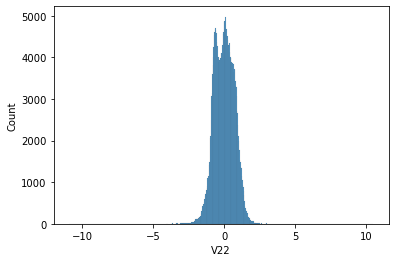

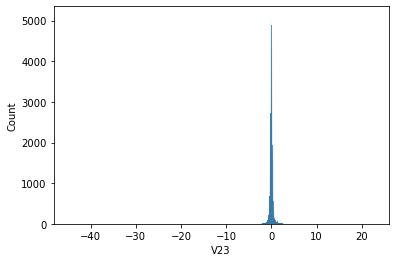

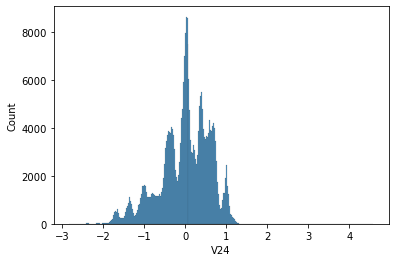

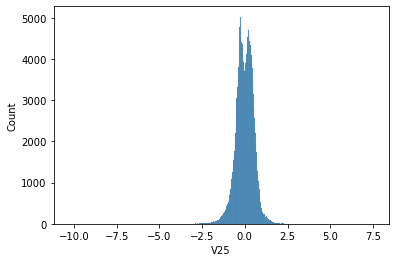

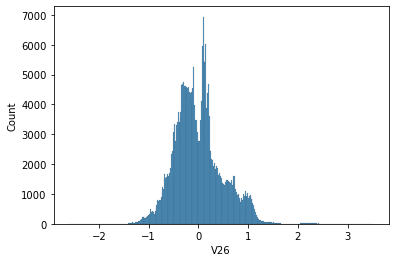

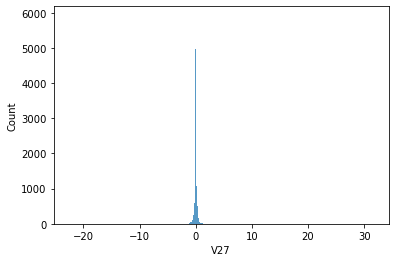

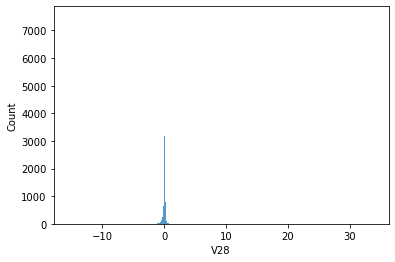

In [8]:
df1 = df.copy()
df1 = df1.iloc[:,2:-1]
for col in df1.columns:
    sns.histplot(df1[col])
    plt.show()
del df1    


In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

skfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skfold.split(X, y):
    print(train_index.shape,test_index.shape)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


(227845,) (56962,)
(227845,) (56962,)
(227846,) (56961,)
(227846,) (56961,)
(227846,) (56961,)


both the train and test label distribution are similarly distributed by stratifiedKfold

In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.We should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.

In [10]:
# Shuffling the data
df = df.sample(frac=1)
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0][:492]
new_df = pd.concat([fraud, non_fraud])

# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=30)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
104273,-0.167819,-0.184459,1.197314,0.236766,0.304818,0.588999,-0.370739,-0.757276,-0.043529,-0.026735,...,-0.088912,-0.237577,-0.768336,0.116095,0.274221,0.164305,0.078130,-0.032121,0.020838,0
81637,-0.240481,-0.301531,-0.823213,2.174555,-2.925874,1.833127,0.265352,-2.029289,0.170370,0.586187,...,-0.245342,-0.052321,-0.089387,0.322570,0.071939,-0.383837,-0.456643,-0.573860,-0.559927,0
128479,0.530986,-0.070102,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,...,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,1
93424,-0.293440,-0.238255,-1.348042,2.522821,-0.782432,4.083047,-0.662280,-0.598776,-1.943552,-0.329579,...,0.348896,1.079871,-0.352026,-0.218358,0.125866,-0.074180,0.179116,0.612580,0.234206,1
37466,0.335359,-0.537189,-1.702812,-0.912017,2.744969,-2.009295,-1.954883,0.382310,-1.369748,0.675680,...,-0.721104,-0.116878,0.479987,0.107881,0.451677,0.424014,-0.174394,-0.129427,-0.066977,0


Let us plot the correlation matrices to understand the data better

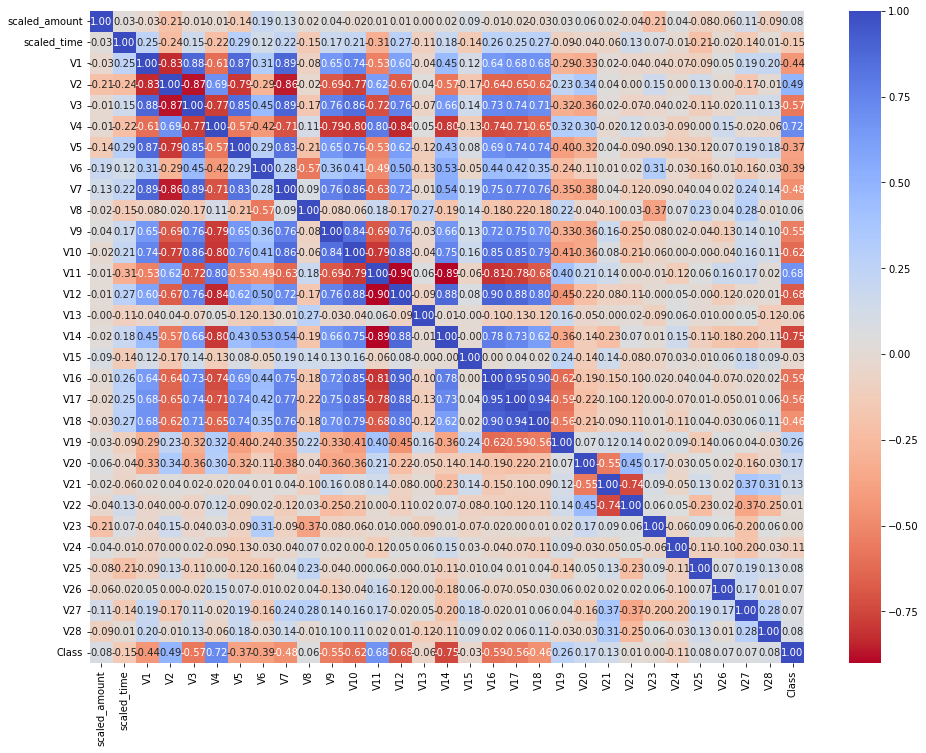

In [11]:
plt.subplots(figsize = (16,12))
sns.heatmap(new_df.corr(),cmap='coolwarm_r', annot = True, fmt = '.2f')
plt.show()

We can see that V2,V4,V11,V19 have high positive correlation whereas V10,V12,V14,V16 have high negative correlation, let us try to visualize them.

Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

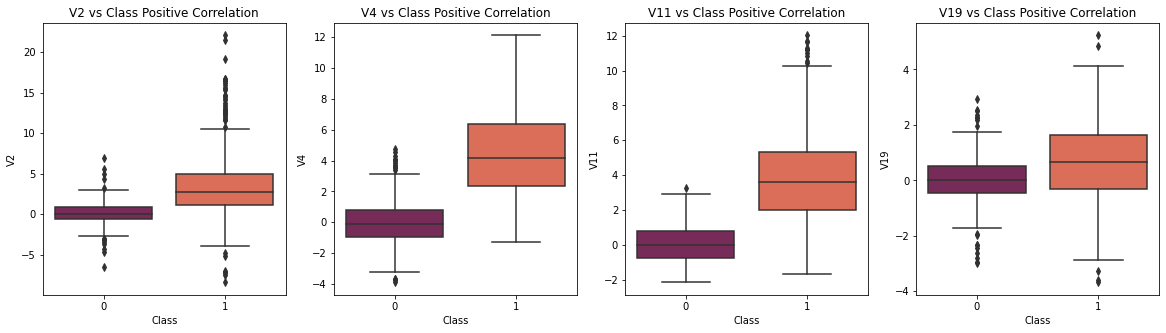

In [12]:
fig,axes = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(x = "Class" , y='V2' , data = new_df,palette="rocket", ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x = "Class" , y='V4' , data = new_df,palette="rocket", ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x = "Class" , y='V11' , data = new_df,palette="rocket", ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x = "Class" , y='V19' , data = new_df,palette="rocket" ,ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

Text(0.5, 1.0, 'V16 vs Class Negative Correlation')

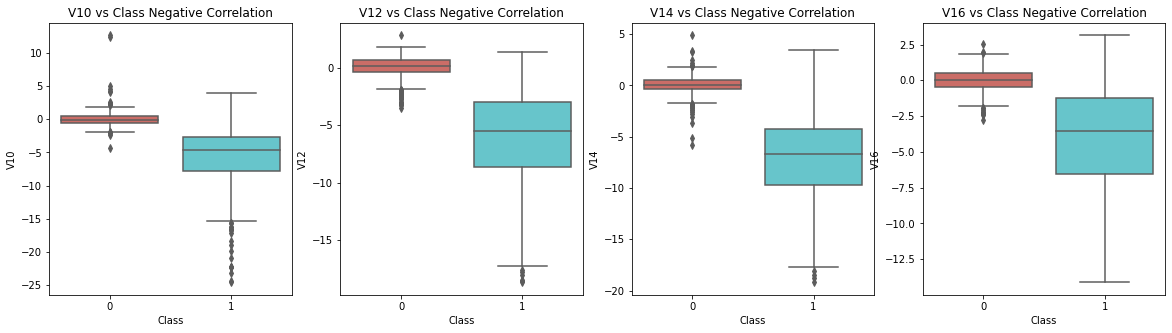

In [13]:
fig,axes = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(x = "Class" , y='V10' , data = new_df,palette="hls", ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x = "Class" , y='V12' , data = new_df,palette="hls", ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x = "Class" , y='V14' , data = new_df,palette="hls", ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x = "Class" , y='V16' , data = new_df,palette="hls", ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')

We can see bit of extreme outliers which have high correlation with the classes. They will have a positive impact on the accuracy,so it is better to remove them

In [14]:
new_df.shape

(984, 31)

In [15]:
#Setting threshold as 1.5
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)

v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

print(new_df.shape)

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)

v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off

print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)

print(new_df.shape)

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)

v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

print('V12 Lower: {}'.format(v10_lower))
print('V12 Upper: {}'.format(v10_upper))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

print(new_df.shape)


V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
(979, 31)
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
(975, 31)
V12 Lower: -14.89885463232024
V12 Upper: 4.92033495834214
(945, 31)


In [16]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation

X_reduced_tsne = TSNE(n_components=2, random_state=30).fit_transform(X.values)


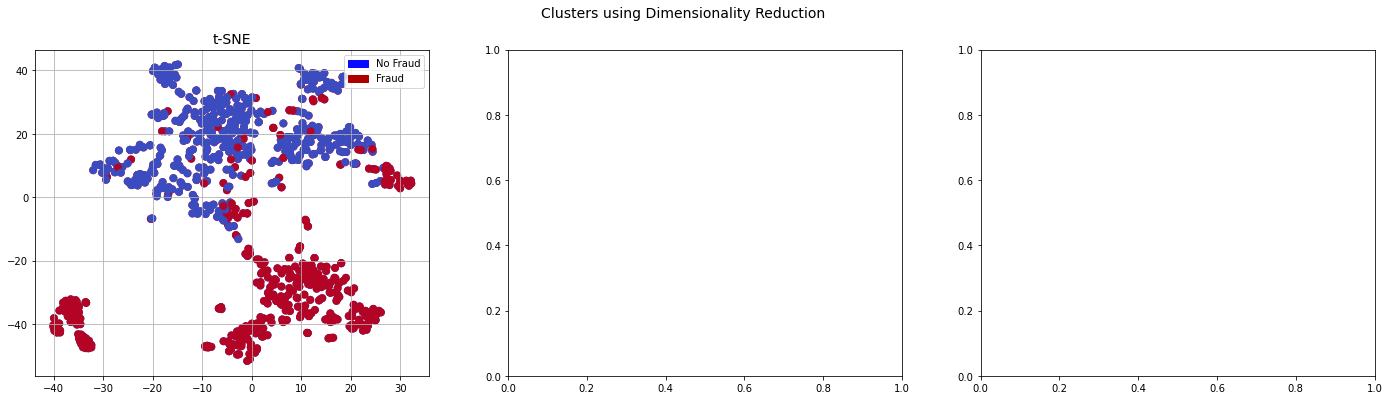

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

In [18]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [19]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    test_pred = classifier.predict(X_test)
    f = f1_score(y_test,test_pred)
    p = precision_score(y_test,test_pred)
    r = recall_score(y_test,test_pred)
    print("F1 Score = %f"%f)
    print('Precision = %f'%p)
    print('Recall = %f'%r)

    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

F1 Score = 0.934911
Precision = 0.940476
Recall = 0.929412
Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
F1 Score = 0.951807
Precision = 0.975309
Recall = 0.929412
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
F1 Score = 0.951220
Precision = 0.987342
Recall = 0.917647
Classifiers:  SVC Has a training score of 93.0 % accuracy score
F1 Score = 0.886364
Precision = 0.857143
Recall = 0.917647
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


Random Forest

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)



Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [22]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9232804232804233 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [28]:
rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)
rfc_imb_model.fit(X_train, y_train)
y_train_pred = rfc_imb_model.predict(X_train)
confusion = confusion_matrix(y_train, y_train)
print(confusion)

[[384   0]
 [  0 372]]


In [29]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [31]:
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9298941798941799
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.9246088193456615


In [32]:
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]
# roc_auc
auc = roc_auc_score(y_train, y_train_pred_proba)
auc


0.9841789874551972

In [33]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[104   0]
 [  8  77]]


In [34]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-", accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9576719576719577
Sensitivity:- 0.9058823529411765
Specificity:- 1.0
F1-Score:- 0.9246088193456615


In [35]:
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]
# roc_auc
auc = roc_auc_score(y_test, y_test_pred_proba)
auc



0.9474696179029063

XGBoost

In [40]:
import xgboost 
from xgboost import XGBClassifier

# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, 

In [42]:
model_cv.best_params_



{'learning_rate': 0.2, 'subsample': 0.3}

In [43]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[18:30:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor=None, ...)

In [44]:
y_train_pred = xgb_imb_model.predict(X_train)
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[384   0]
 [  0 372]]


In [45]:
y_test_pred = xgb_imb_model.predict(X_test)
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[98  6]
 [ 6 79]]


In [46]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9365079365079365
Sensitivity:- 0.9294117647058824
Specificity:- 0.9423076923076923
F1-Score:- 0.9294117647058824


In [47]:
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]
# roc_auc
auc = roc_auc_score(y_test, y_test_pred_proba)
auc

0.9764705882352941

In [48]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       104
           1       0.93      0.93      0.93        85

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189
weighted avg       0.94      0.94      0.94       189

